In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, decomposition, manifold

加载数据，使用鸢尾花数据集：

In [2]:
def load_data():
    iris = datasets.load_iris()
    return iris.data, iris.target

**PCA**

给出测试函数：

In [3]:
def test_PCA(*data):
    X,y = data
    pca = decomposition.PCA(n_components = None)
    pca.fit(X)
    print('explained variance ratio :%s'%str(pca.explained_variance_ratio_))

调用该函数：

In [5]:
X,y = load_data()
test_PCA(X,y)

explained variance ratio :[0.92461621 0.05301557 0.01718514 0.00518309]


绘制降维后样本分布图函数：

In [19]:
def plot_PCA(*data):
    X,y = data
    pca = decomposition.PCA(n_components = 2)
    pca.fit(X)
    X_r = pca.transform(X)
    
    ### 绘图
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
              (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    for label,color in zip(np.unique(y), colors):
        position = y == label
        ax.scatter(X_r[position,0],X_r[position,1],label="target=%d"%label,color = color)
    
    ax.set_xlabel("X[0]")
    ax.set_ylabel("Y[0]")
    ax.legend(loc="best")
    ax.set_title("PCA")
    plt.show()

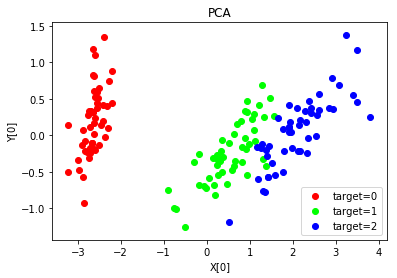

In [20]:
X,y = load_data()
plot_PCA(X,y)

**KernelPCA:**

In [27]:
def test_KPCA(*data):
    X,y = data
    kernels = ['linear','poly','rbf','sigmoid']
    for kernel in kernels:
        kpca = decomposition.KernelPCA(n_components=None, kernel = kernel)
        kpca.fit(X)
        print('kernel=%s-->lambdas:%s' %(kernel,kpca.lambdas_))

In [28]:
X,y=load_data()
test_KPCA(X,y)

kernel=linear-->lambdas:[6.29501274e+02 3.60942922e+01 1.17000623e+01 3.52877104e+00
 1.16262941e-12 5.77193601e-13 2.87963190e-13 1.97265644e-13
 1.28636748e-13 4.72790090e-14 4.61819855e-14 3.21820030e-14
 3.14395599e-14 3.06497707e-14 2.85120846e-14 1.92803703e-14
 1.92494784e-14 1.86835520e-14 1.71181892e-14 1.50611364e-14
 1.50556273e-14 1.44188060e-14 1.30869491e-14 1.28801821e-14
 1.27775277e-14 1.27437621e-14 1.26227996e-14 1.19277118e-14
 1.17939339e-14 1.13866699e-14 1.06741655e-14 1.04994369e-14
 1.03396177e-14 9.66001112e-15 9.58658876e-15 9.38549030e-15
 8.98593349e-15 8.86349609e-15 8.62768523e-15 8.57860843e-15
 8.56981875e-15 7.66667732e-15 7.51501591e-15 7.33453015e-15
 7.12332371e-15 6.90162829e-15 6.84441483e-15 6.66062012e-15
 6.60340400e-15 6.41352043e-15 6.28206859e-15 6.25148390e-15
 6.17844723e-15 6.04851278e-15 5.82947409e-15 5.03652995e-15
 4.84163894e-15 4.69411225e-15 4.52498222e-15 4.46440499e-15
 4.33510146e-15 4.32802884e-15 4.25506822e-15 4.12898668e-15


绘制出降维后样本分布图：

In [33]:
def plot_KPCA(*data):
    X,y = data
    kernels = ['linear','poly','rbf','sigmoid']
    fig = plt.figure()
    colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
              (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    
    for i,kernel in enumerate(kernels):
        kpca = decomposition.KernelPCA(n_components=2, kernel=kernel)
        kpca.fit(X)
        X_r = kpca.transform(X)
        ax = fig.add_subplot(2,2,i+1)
        for label, color in zip(np.unique(y), colors):
            position = y ==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target=%d"%label,color = color)
        ax.set_xlabel("X[0]")
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title("kernel=%s"%kernel)
    plt.suptitle("KPCA")
    plt.show()

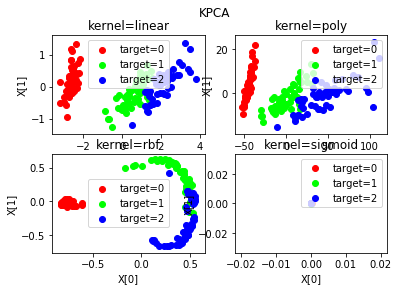

In [34]:
X,y=load_data()
plot_KPCA(X,y)

考察多项式核参数的影响：

In [45]:
def plot_KPCA_poly(*data):
    X,y = data
    fig = plt.figure()
    colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
              (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    Params = [(3,1,1),(3,10,1),(3,1,10),(3,10,10),(10,1,1),(10,10,1),(10,1,10),(10,10,10),]
    
    for i,(p,gamma,r) in enumerate(Params):
        kpca = decomposition.KernelPCA(n_components=2, kernel='poly',
                                      gamma = gamma, degree = p, coef0 = r)
        kpca.fit(X)
        X_r = kpca.transform(X)
        ax = fig.add_subplot(2,4,i+1)
        for label, color in zip(np.unique(y), colors):
            position = y ==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target=%d"%label,color = color)
        ax.set_xlabel("X[0]")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title(r"$(%s(x \cdot z+1)+%s)^{%s}$" %(gamma,r,p))
    plt.suptitle("KPCA-Poly")
    plt.show()

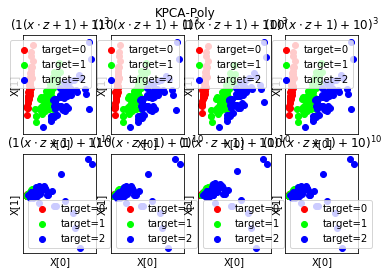

In [46]:
X,y=load_data()
plot_KPCA_poly(X,y)

考察高斯核函数(rbf)的影响:

In [47]:
def plot_KPCA_rbf(*data):
    X,y = data
    fig = plt.figure()
    colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
              (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    Gammas = [0.5,1,4,10]
    
    for i,gamma in enumerate(Gammas):
        kpca = decomposition.KernelPCA(n_components=2, kernel='rbf',
                                      gamma = gamma)
        kpca.fit(X)
        X_r = kpca.transform(X)
        ax = fig.add_subplot(2,2,i+1)
        for label, color in zip(np.unique(y), colors):
            position = y ==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target=%d"%label,color = color)
        ax.set_xlabel("X[0]")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title(r"$\exp(-%s||x-z||^2)$" %gamma)
    plt.suptitle("KPCA-rbf")
    plt.show()

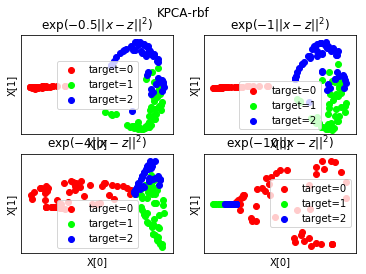

In [48]:
X,y=load_data()
plot_KPCA_rbf(X,y)

最后考察sigmoid核参数的影响：

In [51]:
def plot_KPCA_sigmoid(*data):
    X,y = data
    fig = plt.figure()
    colors = ((1,0,0),(0,1,0),(0,0,1),(0.5,0.5,0),(0,0.5,0.5),(0.5,0,0.5),
              (0.4,0.6,0),(0.6,0.4,0),(0,0.6,0.4),(0.5,0.3,0.2),)
    Params = [(0.01,0.1),(0.01,0.2),(0.1,0.1),(0.1,0.2),(0.2,0.1),(0.2,0.2)]
    
    for i,(gamma,r) in enumerate(Params):
        kpca = decomposition.KernelPCA(n_components=2, kernel='sigmoid',
                                      gamma = gamma, coef0 = r)
        kpca.fit(X)
        X_r = kpca.transform(X)
        ax = fig.add_subplot(3,2,i+1)
        for label, color in zip(np.unique(y), colors):
            position = y ==label
            ax.scatter(X_r[position,0],X_r[position,1],label="target=%d"%label,color = color)
        ax.set_xlabel("X[0]")
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_ylabel("X[1]")
        ax.legend(loc="best")
        ax.set_title(r"$\tanh(%s(x\cdot z)+%s)$" %(gamma,r))
    plt.suptitle("KPCA-sigmoid")
    plt.show()

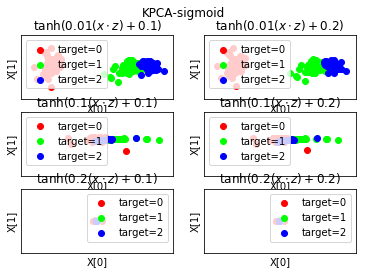

In [52]:
X,y=load_data()
plot_KPCA_sigmoid(X,y)